# Inscriptions as data: digital epigraphy in macro-historical perspective 

* Petra Hermankova, Aarhus University, https://orcid.org/0000-0002-6349-0540 (corresponding author)
* Vojtech Kase, Aarhus University, 
* Adela Sobotkova, Aarhus University


## Abstract

Inscriptions, as short texts written on a permanent medium, represent invaluable historical evidence of past societies, their organisation, cultural norms and practices, demographic patterns and human past behaviour. Several hundred thousand inscriptions in Greek and Latin language survived until today, providing us with a direct line of evidence to populations of large cities but also of rural communities of the entire Mediterranean Basin in the period between the 8th c. BC and 8th c. AD. Despite the enormous historical potential of inscriptions, large-scale and comparative studies are still rare, even though we live in the age of ample digital tools and online databases. The aim of this article is to demonstrate some of the challenges of macro-scale digital history on the example of online epigraphic resources. We have developed a FAIR and open science pipeline to overcome some of the challenges and biases that are not limited to inscriptions, but are inherent to any historical evidence. Amongst others, we discuss the computational approaches to problematic and incomplete datasets, temporal or spatial uncertainty of historical evidence and assess the suitability of traditional vs proposed solutions for historical research. 
	In the current article, we target primarily the first stages of the research lifecycle, such as data-access and streamlining phase as a key and formative aspect of any historical analysis, that is however often made peripheral in favour of analysis and discussion of results. We document the full research lifecycle of work with digital historical datasets in a series of scripts in R and Python, with primary focus on transparency and reproducibility in order to promote scientific collaboration and advance the historical discipline.
We demonstrate our approach on two well-established digital sources for Latin epigraphy, both posing different challenges to any quantitative researcher: Epigraphic Database Heidelberg (EDH) containing over 81,000 of records and Epigraphische Datenbank Clauss-Slaby (EDCS) with 500,000 records.



## Keywords
digital epigraphy; quantitative research; FAIR science; reproducibility; digital history

## GitHub
https://github.com/sdam-au/digital_epigraphy

### Notebook Configuration

In [191]:
# R requirements (when in R kernel):

#install.packages(c("reticulate", "tidyverse"))
devtools::install_github("sdam-au/sdam")

library(reticulate)
library(tidyverse)
library(sdam)
library(ggpubr)


options(warn=-1) # supress all warning messages

Skipping install of 'sdam' from a github remote, the SHA1 (6b1d1a69) has not changed since last install.
  Use `force = TRUE` to force installation



## Introduction
Inscriptions represent a diverse yet comparable source for the long-term studies of the ancient Mediterranean communities, including the evolution of demographic trends, migration patterns, changes of the socio-political organisation and cultural development. Estimates suggest over 600,000 Greek and Latin inscriptions have survived until today, but the overall number can be even higher as new inscriptions are published every year (Beltran-Lloris 2014, 135). Inscriptions vary greatly in form and contents, touching almost all aspects of life in an ancient society. The diverse group of texts range from short private messages on objects of daily use to extensive regulations and laws issued by a political authority, or to monumental inscriptions creating a public image and prestige. In contrast with literary texts that were often preserved via the act of multiple copying, the text of inscription has the original unaltered form with all typographical and grammatical errors. Moreover, the inscriptions were produced by a wider demographic group than literary sources, that were often representing only the elite’s point of view. Thus, the diversity of epigraphic sources and their large number make inscriptions an ideal source for macro-historical studies of ancient society.

In recent years, large digital corpora containing tens of thousands inscriptions were made accessible to any researcher and published online and yet they remain underutilised as resources for quantitative and comparative studies (Elliott 2014, 80-83). Although the analysis of a large body of inscriptions may seem relatively straightforward from an outsider’s point of view, one has to deal with numerous technological, methodological and even ethical challenges when accessing digital datasets. 
    
We will address some of the challenges of large scale comparative research in the digital age on examples of two well established digital resources: 

1. Epigraphic Database Heidelberg (EDH), that represents a flagship resource for Latin epigraphers and pioneer in the open and FAIR epigraphy; 

2. Epigraphic Database Clauss-Slaby, EDCS is the most extensive digital resource for Latin inscriptions, with over 500,000 texts. The overwhelming size of the EDCS unfortunately goes hand in hand with several shortcomings and well known limitations of the dataset. 
    
In accordance with the Open and FAIR science practice, we advocate for transparency during the full research lifecycle, including its preliminary data-collection and access stages. We believe the only way forward for any digital researcher is to document all methodological decisions leading to modifications to the dataset alongside with the raw data and to do so in an open and accessible manner. Thus, all the stages of our project are accessible via public repositories on GitHub and Zenodo under CC-BY-SA 4.0 International license. Should anyone wish to build upon our work, or use the tools or methods we have developed, the provided license clearly states the conditions and thus facilitates the collaborative and inclusive research environment.


## Data sources

We have chosen two well established digital sources for Latin inscriptions, Epigraphic Database Heidelberg and Epigraphic Database Clasuss-Slaby in order to demonstrate the range of challenges a digital historian has to face when doing comparative historical research. We shortly present both sources and contrast their contents in relation to available spatial and chronological metadata and the epigraphic texts, all crucial aspects of quantitative analysis inscriptions over space and time.


### Epigraphic Database Heidelberg 

The Epigraphic Database Heidelberg ([EDH](https://edh-www.adw.uni-heidelberg.de/)) represents the flagship digital resource for the discipline of digital epigraphy with over 30 years of development and high quality of its outputs. Thus, the EDH dataset with more than 81,000 inscriptions provides a representative sample of the total body of inscriptions from the Mediterranean dating from the 6th century BC to the 9th century AD covering most of the area of the former Roman Empire.

EDH is one of the pioneers of digital and open epigraphy, providing access to high standard digital resources. The original [aim of the project](https://edh-www.adw.uni-heidelberg.de/projekt/konzept) financed by the Heidelberg Academy of Sciences And Humanities is to *“to render the epigraphic documentation of the provinces of the Roman Empire as completely and reliably as possible for online research work”* . The EDH follows the FAIR principles: all data of the Open Data Repository can be reused under the CC BY-SA 4.0 [licence](https://edh-www.adw.uni-heidelberg.de/data), making an ideal candidate for quantitative research on epigraphic cultures of the Mediterranean. 

The data is accessible via public API ([Application Programming Interface](https://edh-www.adw.uni-heidelberg.de/data/api)) and its editors are responsible for the quality of data entry as noted directly in individual XML files. Alternatively, the data can be accessed in raw Epidoc XML files, either directly on the website, GitHub pages or through Zenodo archive. However, based on the personal communication in 2020 with the maintainer of the EDH digital archive Frank Grieshaber, the API contains the most updated version of the data and will do so until the end of 2021. The accessibility of the future of the dataset beyond 2022 will be ensured by the release of the data-archives on Zenodo and on GitHub. As of March 2021, the phase of active data-entry is planned to finish in December 2021 with the end support by the Heidelberg Academy of Sciences.


#### Contents of the EDH
In June 2019 the authors claimed the database contained over 1.4 million metadata fields, averaging 18 metadata fields per inscription (Grieshaber 2019). As of September 2020, the EDH contained over 81,476 inscriptions, almost 40,000 photographs, 30,000+ locations and over 16,000 bibliographical publications.	

The EDH API provides direct access to the latest data, containing 11 attributes providing spatial and temporal metadata, object metadata, as well as the text of an inscription, its typological categorisation, bibliographical references and links to related digital sources and photos. Geospatial data are stored separately in the Geo API, as well as bulk dump with individual XML files containing additional metadata not present in the EDH API. We have combined all three sources to obtain as rich a resource as possible. After initial streamlining and cleaning of our dataset contains data from all the tree sources in 74 attributes, a dataset set which we use to demonstrate our approach. We have accessed the data on 22 September 2020 through the APIs and the XML dumps available via the project’s website and extracted a dataset containing 81,476 inscriptions in total. We will discuss the entire access and preprocessing of the dataset and the technological solutions in the methodological section. 

In [3]:
# Loading the EDH dataset from public folder on Sciencedata.dk using sddk package

# Implement with sdam
resp = sdam::request("EDH_text_cleaned_2021-01-21.json", path="public/b6b6afdb969d378b70929e86e58ad975/", method="GET", anonymous = TRUE)
list_json <- jsonlite::fromJSON(resp)
EDH = as_tibble(list_json)

In [4]:
# Displaying the first three records
EDH[1:3,]

responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,⋯,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,findspot,year_of_find,present_location,religion,geography,social_economic_legal_history,military
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<list>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 1980/81, 286-287, Nr. 17; fig. 17. (C) - AE 1983.",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI / PARENTIBVS / LIBERTIS LIBERTABVSQVE / POSTERISQVE EORVM / C IVLIVS C F OPTATVS / FILIVS,"Noniae P.f. Optatae , C. Iulio Artemoni , C. Iulius C.f. Optatus, Optata , Artemo , Optatus , Nonia , Iulius , Iulius , 1 , 2 , 3 , female , male , male , NA , C. , C.",2.7 cm,⋯,D M Noniae P f Optatae et C Iulio Artemoni parentibus libertis libertabus que posteris que eorum C Iulius C f Optatus filius,Dis Manibus Noniae Publi filiae Optatae et Caio Iulio Artemoni parentibus libertis libertabus que posteris que eorum Caius Iulius Cai filius Optatus filius,Dis Manibus Noniae Publi filiae Optatae et Caio Iulio Artemoni parentibus libertis libertabus que posteris que eorum Caius Iulius Cai filius Optatus filius,NA,NA,NA,NA,NA,NA,NA
Feraudi,epitaph,4 cm,0200,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 109, Nr. 7. - AE 1983.",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"Sextius , C. , 1 , 70 , Paris , male , C. Sextius Paris",NA,⋯,C Sextius Paris qui vixit annis LXX,Caius Sextius Paris qui vixit annis LXX,Caius Sextius Paris qui vixit annis LXX,"Via Nomentana, S. Alessandro, Kirche",1937,NA,NA,NA,NA,NA
Feraudi,honorific inscription,4.5-3 cm,0170,"AE 1983, 0518. (B); J. González, ZPE 52, 1983, 172-173; Taf. 5b. (B) - AE.",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"Mummius+ , male , P.+ , 1 , Galeria+ , [P. M]ummio [P.f. Gal. S]isenna[e Rutiliano], senatorial order , Sisenna+ Rutilianus+",(12) cm,⋯,ummio isenna Xv,Publio Mummio Publi filio Galeria Sisennae Rutiliano X viro stlitibus iudicandis,Publio Mummio Publi filio Galeria Sisennae Rutiliano X viro stlitibus iudicandis,NA,before 1975,"Sevilla, Privatbesitz",NA,NA,NA,NA


#### Language of inscriptions in EDH
The vast majority of the 81,476 inscriptions recorded in the EDH database is written in Latin (97.57 % of all inscriptions). Greek inscriptions represent 1.58 %, combined Greek-Latin inscriptions 0.81 % and the rest consisting of other Mediterranean languages such as Phoenician, Punic, Celtic, Hebrew, Iberian, Italic, Numidian or Palmyrenic and their combination with mostly Latin. Therefore, the EDH dataset predominantly represents epigraphic cultures publishing in Latin, rather than all epigraphic languages of the Mediterranean. We have to bear in mind, the EDH dataset does not provide a representative sample for Greek writing cultures of the Roman East, although the EDH dataset covers the Latin inscriptions from Eastern Mediterranean.

In [31]:
# How many languages are represented in EDH 

lang_EDH<- as.data.frame(table(unlist(EDH$language)))
lang_EDH<- lang_EDH %>% 
  mutate(Percentage = Freq/(nrow(EDH)/100))
lang_EDH$Percent_round<- round(lang_EDH$Percentage, digits = 2)
lang_EDH

Var1,Freq,Percentage,Percent_round
<fct>,<int>,<dbl>,<dbl>
Celtic,1,0.001227355,0.00
Celtic-Latin,4,0.004909421,0.00
Greek,1290,1.583288330,1.58
Greek-Hebrew-Latin,1,0.001227355,0.00
Greek-Latin,654,0.802690363,0.80
Hebrew-Iberian-Latin,1,0.001227355,0.00
Hebrew-Latin,4,0.004909421,0.00
Iberian-Latin,1,0.001227355,0.00
Italic-Latin,2,0.002454711,0.00


#### Spatial information in EDH
EDH records spatial metadata of the findspot of an inscription either in the form of textual description of the findspot, that can be broken into several categories, such as the name of ancient settlement, Roman Province, modern country, region of modern place name, or alternatively place of the present location of the inscription, and as geospatial coordinates. 

The numeric geospatial coordinates denote an exact location on the surface of the Earth, making them an ideal candidate for quantified analysis. Their numeric format provides a computationally accessible means of placing the findspot on a map. Then we can relatively easily explore any occurring spatial patterns, such as their clustering in the proximity of large settlements or roads, commercial hubs or religious sanctuaries. Of the total 81,476 inscriptions in the EDH, the 97 % has assigned geospatial coordinates that enable us to place them on a map, while 2,464 inscriptions have missing geospatial coordinates (3 % of all inscriptions). 

The precision of the coordinates vary from zero decimal places to four decimal places (e.g. 42 or 42.3681). One decimal place in real life represents a precision up to 11.1 km, two decimal places 1.1 km, three decimal places 110 m and four decimal places corresponds with 11 m precision of locating the exact position on the Earth’s surface. Almost 80 % of the EDH dataset contain both coordinates with four decimal places, suggesting the majority of the dataset can be securely placed on a map with 11 m margin of error. The reality might be less optimistic and the margin of error is likely to be in the range of several hundreds of metres or few kilometres in the best cases. The precision of the numeric coordinates, however, may reflect several other factors, than the precise localization of the findspot on Earth’s surface. Several of the factors influencing how many decimal places the coordinates contain are: 
* the detail of knowledge of the original findspot as preserved in legacy data, 
* the result of the granularity of georeferencing method during the process of digitisation, 
* the quality of the adopted linked open dataset.

As the geospatial coordinates did not exist when most of the inscriptions were found and published, they had to be reconstructed on the basis of textual description of the location given by the author of the editio princeps (e.g. also known as georeferencing of legacy data). The precision of such textual descriptions highly vary: we can thus pinpoint the location of some inscriptions to one spot, street or archaeological site, whilst others were found in the vicinity of place X, or between place Y and Z. The accuracy of geospatial coordinates depends also on the amount of available legacy data on the original findspot of the inscription. Generally, inscriptions where the ancient findspot is known and can be associated with an existing archaeological site, have the most precise coordinates (with the most decimal numbers). Coordinates of inscriptions, where only the name of the Roman province or modern country is known, tend to have a low accuracy, represented by fewer decimal numbers of their coordinates. 

The process of digitisation of legacy data containing spatial elements may also influence the resulting form and precision of geospatial coordinates. If, for example, a coordinate is extracted from Google Maps, it contains six decimal places by default. The spatial precision to six decimal places may not indicate the level of precision we have about the ancient findspot, but rather it refers to the method of their creation.

The present-day coordinates as they are in the EDH are derived from major Open Source projects such as Pleiades, Trismegistos or from an internal EDH database of Places, all providing a stable URI of the location. Any error or imprecision in the LOD dataset, however, is inherited in the EDH as well. The coordinates in the EDH were either selected from an existing pool of locations in the mentioned major databases, or created ad hoc during the data-entry phase in the last two decades. To prevent any inheritance of errors, each inscription in EDH is curated by a ‘responsible individual’ who maintains the quality of information stored in individual XML files. Our current analysis is fully reliant on the accuracy of data provided by EDH.

In [137]:
location_EDH<- EDH %>% 
  select(id, coordinates, findspot_ancient, findspot_ancient_clean, findspot_ancient_certainty, province_label, province_label_clean, province_label_certainty, country, country_clean, country_certainty, modern_region, modern_region_clean, modern_region_certainty, findspot_modern, findspot_modern_clean, findspot_modern_certainty, findspot, findspot_clean, findspot_certainty, present_location, edh_geography_uri, commentary)

# how many inscriptions have spatial coordinates available
nrow(EDH)-sum(str_count(location_EDH$coordinates, "list()"))
                    
# how many % of inscriptions have spatial coordinates available
(nrow(EDH)-sum(str_count(location_EDH$coordinates, "list()")))/(nrow(EDH)/100)


[1] 79012

[1] 96.9758

In [138]:
location_EDH <- location_EDH %>% 
  separate(col = coordinates, into = c("latitude", "longitude"), sep = ",", remove = FALSE) %>% 
  mutate(latitude = as.numeric(str_extract(latitude, "[-]*\\d{1,2}\\.\\d+"))) %>% 
  mutate(longitude = as.numeric(str_extract(longitude, "[-]*\\d{1,2}\\.\\d+")))

In [39]:
# Function to count decimal places

decimalplaces <- function(x) {
  x_str <- toString(x)
  x_str<- str_split(x_str, "\\.")
  nchar(x_str[[1]][2])
}

In [56]:
loc_prec_EDH<- location_EDH  %>% 
    select(latitude, longitude)  %>% 
    mutate(latitude_decim = map(location_EDH$latitude, decimalplaces))  %>% 
    mutate(longitude_decim = map(location_EDH$longitude, decimalplaces))     


In [180]:
loc_prec_EDH  %>% 
    filter(!is.na(latitude_decim) & !is.na(longitude_decim))  %>% 
    count(latitude_decim, longitude_decim, sort = T) %>% 
    mutate(percent = n/(sum(n)/100))  %>% 
    mutate(percent = round(percent, 2))  %>% 
    head()

latitude_decim,longitude_decim,n,percent
<list>,<list>,<int>,<dbl>
4,4,62847,79.78
3,4,5659,7.18
4,3,5078,6.45
2,4,1668,2.12
4,2,1320,1.68
3,3,564,0.72


#### Chronological information in EDH
Chronological information is in the EDH database distributed across six attributes, either as textual or numeric values representing the most probable date of an inscription. The date is stored as an interval between the two points in time, represented by attributes `not before` and `not after`. 

The `not_before` attribute represents the earliest possible year when the inscription was created. The `not_before` attribute is available for 59,788 (73.38 % of all) inscriptions in the EDH, ranging from 530 BC to AD 901 (excluding the dates from 19th and 20th century AD). The `not_after` attribute stands for the latest possible year when the inscription was created. The `not_after` attribute is available for 56,281 (69.08 % of all) inscriptions, covering the time range from 503 BC to 950 AD, excluding the 16th and 20th century outliers. For computational reasons and the ease of use, all the dates in Epidoc XML and in the EDH API have been simplified into the four digits, representing a year, e.g. `-0143` stands for 143 BC, `0036` stands for AD 36. Both numeric attributes are present in 56,281 inscriptions (69.08 % of all), with the average length of the interval between the two dates as 120.5 years. 

For most of the texts, the EDH API nor the raw XML files provide any additional information on how precise the date is or which dating method was used to determine the exact date. The original Epidoc XML files provide a reference to a dating system used, such as the Julian calendar, but any other details are not available in the digital dataset. If such information was available in the original paper publication, it did not get transferred to the EDH. Occasional comments in the attribute ‘commentary’ provide only sporadically chronological information, and if so, then only as unconstrained text, that is computationally difficult to access. Thus, we have to trust the decisions made by editors of the original volumes and the responsible personnel from the EDH team and use the data in the form provided. The existence of computer accessible dates enables us to study: 
* chronological trends of epigraphic production over time, 
* trends in the precision of dating over the entire corpus,

as is demonstrated in the Analysis section.

In [13]:
# Transforming the date to numeric
EDH<- EDH  %>% 
    mutate(not_before = as.numeric(unlist(not_before)))  %>% 
    mutate(not_after = as.numeric(unlist(not_after)))

In [20]:
# How many inscriptions have both start and end date
EDH_dated <- EDH  %>% 
    filter(!is.na(not_before) & !is.na(not_after))

nrow(EDH_dated)
nrow(EDH_dated)/(nrow(EDH)/100)

[1] 56281

[1] 69.07678

In [58]:
EDH_dated  %>% 
    select(not_before, not_after)  %>% 
    mutate(interval = (not_before - not_after) * -1) %>% 
    summary()

   not_before       not_after         interval    
 Min.   :-530.0   Min.   :-503.0   Min.   :  0.0  
 1st Qu.:  51.0   1st Qu.: 160.0   1st Qu.: 49.0  
 Median : 101.0   Median : 250.0   Median : 99.0  
 Mean   : 118.3   Mean   : 238.7   Mean   :120.5  
 3rd Qu.: 171.0   3rd Qu.: 300.0   3rd Qu.:163.0  
 Max.   :1997.0   Max.   :1998.0   Max.   :899.0  

#### Textual information in EDH
The text of an inscription was available to 81,473 records, representing 99,99 % of the entire dataset. The text contained a large number of symbols and editorial marks preventing any meaningful computational analysis of the text. We have created a cleaning pipeline, eliminating most of the problematic symbols while maintaining the integrity of the text, for details see the methodological section.

The cumulative length of texts of all inscriptions before cleaning was ranged between 1.81 to 1.89 million words, depending on the counting method. After the cleaning, the text of all inscriptions contained between 1.14 and 1.22 million words.

In [130]:
# Counting number of words in the original text and after the cleaning, comparing results of base and stringr methods
base_orig <- sum(lengths(base::gregexpr("\\w+", EDH$transcription)) + 1)
stringr_orig <- sum(na.omit(stringr::str_count(EDH$transcription, '\\w+')))
base_clean <- sum(lengths(base::gregexpr("\\w+", EDH$clean_text_interpretive_word)) + 1)
stringr_clean <- sum(na.omit(stringr::str_count(EDH$clean_text_interpretive_word, '\\w+')))

EDH_text <- as.data.frame(cbind(base_method = c(base_orig, base_clean)))
EDH_text <- c(EDH_text, as.data.frame(cbind(stringr_method = c(stringr_orig, stringr_clean))))
EDH_text<- as.data.frame(EDH_text)

EDH_text

base_method,stringr_method
<dbl>,<int>
1898939,1817284
1226249,1144726


### Epigraphik Datenbank Clauss-Slaby

The Epigraphik Datenbank Clauss-Slaby ([EDCS](http://www.manfredclauss.de/)) represents the largest digital resource for Latin epigraphy. It contains information for over 500,000 inscriptions previously published in print, covering the entire Mediterranean from 7th c. BC to the 10th c. AD. We have specifically chosen the EDCS for its unparalleled spatial and temporal coverage, being aware of its limitations.

The original project of Prof. Manfred Clauss and Dr. Wolfgang A. Slaby, currently hosted by the Catholic University Eichstätt-Ingolstadt, dates back to 1980 and its main goal was to create one digital source for all Latin inscriptions. The project is constantly being developed and new inscriptions are being added to the database in 2021 and published in the [EDCS Journal](http://db.edcs.eu/epigr/hinweise/edcs-journal.php?s_language=en).  The EDCS website states the database contains 817,455 sets of data, of which 521,696 are inscriptions, 22,232 places and 184,323 datings (info from 12 Dec 2020). The database combines data from 37 other [digital sources](http://db.edcs.eu/epigr/hinweise/verbindung.html). One of the sources is also EDH, but only about 91 % (74,313 inscriptions) of the data is available through EDCS and with a limited number of attributes than in the original source.

The license is not specified as in the case of EDH, making the data *‘subject to copyright and other laws for the protection of intellectual property’*. The access to the database is via a web interface allowing users to search for predefined attributes, such as province, place, material, date and of course the text of the inscription. However, the search results can be only visualised on the website, or copied manually one-by-one. Moreover, if one wants to quote the results of their search, the website does not provide unique identifiers, nor preserve the search results in any format. Thus, the web interface is not intended for quantitative research, yet it currently represents the only public access point to the data. 

The EDCS represents the largest epigraphic database in existence but potentially due to its size, contains shortcomings and inconsistencies (Elliott 2014,80-81). For example, the attribute containing text of inscription have a form of freetext transcription extracted from published editions. Unfortunately, the attribute along with the text of inscriptions contain also a relatively large amount of non-related data, such as notes, commentaries or bibliographical information that was not part of the original text of the inscriptions. We have spent a lot of time trying to streamline such inaccuracies and we are hoping to share our results with EDCS in order to improve the accuracy of the dataset. 

Another issue of data accessibility that has a potential to influence results of any comparative study is the inconsistent data output on the web interface concerning the total numbers of inscriptions in individual provinces. To provide an example, if we search using the web interface for all inscriptions coming from province Roma (search term `province` = `Roma`), the website states there are 121,165 inscriptions from Rome. But when we count individual record IDs and their associated attributes, we get only 90,531 individual records. Therefore, there is a discrepancy of 30,364 records, either caused by the rendering limitations of the site or the calculation algorithm diplayin the total number of `inscriptions found` on the [website](http://db.edcs.eu/epigr/epikl_ergebnis.php) is incorrect. However, this particular issue has been only noted with the province Roma, with the other provinces the number of unique IDs was corresponding with the calculated total number of inscriptions.

Even for its known shortcomings, EDCS represents the largest digital corpus for Latin inscriptions that is publicly available online and accessible to simple search. We had to come up with several and technological solutions to be able to perform quantitative research, which we will discuss in more detail in the methodological section.
   

#### Contents of EDCS
The EDCS web search interface contains 16 attributes providing spatial and temporal metadata, object metadata, as well as the text of an inscription, its typological categorisation, bibliographical references and links to related digital sources and photos where available. We have accessed the dataset on 9 December 2020 when the [web interface](http://db.edcs.eu/epigr/epi.php?s_sprache=en) contained 500,536 inscriptions in total. We will discuss the details of the ETL process in the methodological section.

In [22]:
# Loading the EDCS dataset from public folder on Sciencedata.dk using sddk package

resp = request("EDCS_text_cleaned_2021-03-01.json", path="/public/1f5f56d09903fe259c0906add8b3a55e/", method="GET", anonymous = TRUE, cred = NULL)

list_json <- jsonlite::fromJSON(resp)
EDCS = as_tibble(list_json)


In [24]:
# Displaying the first three records
EDCS[1:3,]

EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,⋯,dating from,dating to,start_yr,end_yr_1,status,Latitude,Longitude,photo,Material,Comment
<chr>,<chr>,<chr>,<list>,<chr>,<list>,<list>,<chr>,<list>,<list>,⋯,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
EDCS-31400030,"CIL 03, 12297",Achaia,Achaia,?,?,NULL,,NULL,NULL,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
EDCS-24700151,"CIL 01, 02650 (p 1097) = IG-05-01, 00741 = ILLRP 00962",Achaia,Achaia,Afesou,Afesou,NULL,,NULL,NULL,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
EDCS-24900077,"CIL 01, 00746 (p 944) = D 00867 = ILLRP 00374 (p 327) = Hesperia-2015-602",Achaia,Achaia,Agia Triada / Merbaka / Midea,"Agia Triada, Merbaka , Midea",-68,,"officium/professio, ordo senatorius , tituli honorarii , tria nomina , viri",tituli honorarii,⋯,-68,-68,-68,-68,officium/professio; ordo senatorius; tituli honorarii; tria nomina; viri,37.6381128,22.8052991,http://db.edcs.eu/epigr/bilder.php?bilder.php?s_language=en&bild=PH0004362;$D_00867.jpg,NA,NA


In [25]:
EDCS<- EDCS %>% 
  filter(!is.na(`EDCS-ID`))

#### Language of inscriptions in EDCS
Although EDCS aims to collect primarily on Latin inscriptions, representing 95.39 % of the entire corpus, in some cases inscriptions in other languages are recorded. The information about language is not recorded as a separate attribute, but rather it is inserted into the text of the inscription as an abbreviation in double quotes, e.g. `“GR”`, `“ETR”`, `“PUN”` etc. Latin language is not recorded with the assumption that all inscriptions are Latin, unless stated otherwise. The only way to extract the total number of Latin inscriptions, is to separate all notations of other languages into a separate attribute and count only the records where the language attribute is empty. Thus we are potentially counting also inscriptions where the language is not known or not recorded, but the structure of EDCS does not provide any means to distinguish between truly empty records or records that are in Latin language. 

The second numerous group are inscriptions that contain at least one word in Greek, representing 4.38 % of the entire corpus (21,933 inscriptions). It is worth noting, the metadata of the Greek inscriptions are in the EDCS recorded but the text itself of the inscriptions is, unfortunately, missing. Thus, the text of inscriptions is available only for 95,8 % of all inscriptions in the EDCS.

From other language groups, EDCS contains data for inscriptions in Iberian, Etruscan, Punic, Hebraic, Oscan and at least a dozen other languages but they seem to be recorded rather episodically (less than 0.3 % in total). Similarly as in the case of EDH, the contents of EDCS reflect epigraphic traditions of the Latin speaking world throughout the Mediterranean. The Greek publishing communities are not in EDCS recorded systematically and thus serve only as a reminder that some publishing communities were bi- or trilingual.


In [131]:
# How many and which combinations of languages are in EDCS?

lang_EDCS<- as.data.frame(table(unlist(EDCS$language)))
lang_EDCS<- lang_EDCS %>% 
  mutate(Percentage = Freq/(nrow(EDCS)/100))
lang_EDCS$Percent_round<- round(lang_EDCS$Percentage, digits = 2)
lang_EDCS

Var1,Freq,Percentage,Percent_round
<fct>,<int>,<dbl>,<dbl>
ARAM,1,0.0001997858,0.00
ETR,203,0.0405565234,0.04
"ETR, GR",1,0.0001997858,0.00
GE,1,0.0001997858,0.00
GR,21859,4.3671184490,4.37
"GR, GR",26,0.0051944316,0.01
"GR, GR, GR",3,0.0005993575,0.00
"GR, GR, GR, GR, GR",1,0.0001997858,0.00
"GR, HEBR",21,0.0041955024,0.00


In [77]:
# How many records contain text in Greek?
grep(x = EDCS$language, "GR", value = TRUE) %>%
  length() -> greek
greek

# How many percent from all inscriptions contain Greek
greek/(nrow(EDCS)/100)

[1] 21933

[1] 4.381903

In [82]:
# How many inscriptions have language as 'NA' (which should correspond with Latin)

nrow(filter(EDCS, is.na(language)))
nrow(filter(EDCS, is.na(language)))/(nrow(EDCS)/100)

[1] 477467

[1] 95.39114

#### Spatial information in EDCS
Similarly as in the case of EDH dataset, EDCS provides spatial metadata connected with an findspot of an inscription in the form of text or geospatial coordinates. The textual description of the findspot can be broken into several categories, such as the name of an ancient settlement and Roman province. In comparison with EDH, EDCS dataset provides fewer textual attributes with spatial information. However, geo-coordinates in numeric form  are present for most inscriptions and they prove to be the most important attributes for quantified spatial analysis. 

The total of 486,699 inscriptions representing 97.23 % of the entire dataset contains spatial coordinates determining their findspot on the Earth’s surface. The precision of the coordinates vary from zero decimal places up to seven decimal places, which in the real world translates as a range between 11.1 km to 11 mm. From all records with recorded coordinates, in over 82 % cases the coordinate attribute contains seven decimal places, suggesting the dataset can be very precisely located with a precision around 1 cm. In reality, that is never the case and the precision usually ranges between several hundred metres to few kilometres in ideal cases (REF Janouchova 2014 [TBA]).

As already discussed in the case of EDH, most epigraphic datasets were created before the wide availability of GPS and as such the spatial information should be approached as legacy data with a varying degree of imprecision. The coordinates of legacy data on their own do not represent the best measure to determine the accuracy of the original findspot as they tend to reflect the process of their creation in bulk, for example when extracting from LOD sites, such as [Trismegistos](https://www.trismegistos.org/index.php) or [Pleiades](https://pleiades.stoa.org/), or simply when manually transferring Latitude and Longitude from Google Maps. Unfortunately, the digital sources often do not provide further information on the provenance, i.e. whether the inscription was found in situ or in its secondary context, transferred to a church or built into a wall. Until such information is made available in digital corpora, the available coordinates even with their known biases and limitations represent the best geospatial resource in hand.

When we compare the coordinates from EDH with EDCS, the majority of EDH dataset (86 %) contains only four decimal digits at maximum precision, while the majority of EDCS dataset (83 %) has seven decimal places precision. In theory, EDCS should provide more accurate spatial data, but the fewer textual attributes specifying the original findspot suggest otherwise. EDH provides coordinates with precision in metres instead of centimetres, but because it records more detailed descriptions of the original findspot the data are likely a more reliable source of information than EDCS, provided that all EDH records are checked individually by a responsible individual. Due to the extent of EDCS, we are assuming the coordinates were rather assigned in bulk than checked manually one-by-one, leaving more space for inaccuracies.

In [133]:
EDCS %>%
  dplyr::filter(!is.na(Latitude)& !is.na(Longitude)) -> location_EDCS

# How many inscriptions have Latitude

nrow(location_EDCS)

# How many % of inscriptions have Latitude
nrow(location_EDCS)/(nrow(EDCS)/100)

[1] 486697

[1] 97.23516

In [143]:
# Function to count decimal places

decimalplaces <- function(x) {
  x_str <- toString(x)
  x_str<- str_split(x_str, "\\.")
  nchar(x_str[[1]][2])
}

In [144]:
loc_prec_EDCS<- location_EDCS  %>% 
    select(Latitude, Longitude)  %>% 
    mutate(latitude_decim = map(location_EDCS$Latitude, decimalplaces))  %>% 
    mutate(longitude_decim = map(location_EDCS$Longitude, decimalplaces))     

In [179]:
loc_prec_EDCS  %>% 
    filter(!is.na(latitude_decim) & !is.na(longitude_decim))  %>% 
    count(latitude_decim, longitude_decim, sort = T) %>% 
    mutate(percent = n/(sum(n)/100))  %>% 
    mutate(percent = round(percent, 2))  %>% 
    head()

latitude_decim,longitude_decim,n,percent
<list>,<list>,<int>,<dbl>
7,7,384802,79.06
6,6,42156,8.66
6,7,30195,6.20
7,6,23505,4.83
7,8,4327,0.89
6,8,460,0.09


In [178]:
# How many inscriptions from EDCS have both coordinates with at least four decimal points
EDCS_above_4<- loc_prec_EDCS  %>% 
    filter(!is.na(latitude_decim) & !is.na(longitude_decim))  %>% 
    filter(latitude_decim > 4 & longitude_decim > 4)  

nrow(EDCS_above_4)
nrow(EDCS_above_4) / (nrow(EDCS)/100)

[1] 486194

[1] 97.13467

#### Chronological information in EDCS
Chronological information in the EDCS database is distributed across three attributes, either as textual description or a numeric value presented as a text string. The EDCS does not provide any additional information on how precise the date is or which dating method was used for most of the texts. In some cases when more than one dating is available, the variant dating is placed into the attribute containing the text of an inscription which complicates any further analysis and needs to be computationally separated.

The attributes `dating to` and `dating from` represent an interval between the two years. Both attributes have a form of free-text and need to be converted to numeric values. In 121 cases the `dating to` attribute contains an alternative dating within the same attribute (as an unconstrained text, with values separated by semicolon). Before any computation operations are possible, we had to preprocess and streamline the attribute and we have created new attributes with single numeric values (attibutes `start_yr` and `end_yr_1`, for details see the methodological section). 

The `dating from` attribute is available for 163,497 representing 32.7 % of all inscriptions, ranging from 700 BC to 901 AD (excluding the dates between 11th and 20th century AD). The `dating to` attribute provides dates for 164,458 inscriptions which corresponds with 32.8 % of the dataset, ranging from 671 BC to 950 AD (excluding the outlier dates between 11th and 20th century AD). Both numeric attributes are present in 163,380 inscriptions (32.6 % of the entire dataset. The average value for the length of the dating interval between `dating from` and `dating to` is 92.25 years. 

When compared with EDH, EDCS provides some additional 110,000 data points for temporal study, but the overall ratio of dated inscriptions in the entire corpus is twice as low. Therefore any temporal analysis based solely on EDCS has a lower significance than the same analysis performed on the EDH dataset. 

In [182]:
# How many inscriptions have both start and end date
EDCS_dated <- EDCS  %>% 
    filter(!is.na(start_yr) & !is.na(end_yr_1))

nrow(EDCS_dated)
nrow(EDCS_dated)/(nrow(EDCS)/100)

[1] 163380

[1] 32.64101

In [183]:
EDCS_dated  %>% 
    select(start_yr, end_yr_1)  %>% 
    mutate(interval = (start_yr - end_yr_1) * -1) %>% 
    summary()

    start_yr         end_yr_1         interval      
 Min.   :-700.0   Min.   :-671.0   Min.   :-321.00  
 1st Qu.:   1.0   1st Qu.: 100.0   1st Qu.:  39.00  
 Median : 101.0   Median : 200.0   Median :  99.00  
 Mean   : 125.1   Mean   : 217.4   Mean   :  92.25  
 3rd Qu.: 201.0   3rd Qu.: 300.0   3rd Qu.: 119.00  
 Max.   :1998.0   Max.   :2009.0   Max.   :1908.00  

#### Textual information in EDCS
Text of an inscription is available for 479,546 inscriptions, representing 95.8 % of all EDCS. The records with missing text of an inscription are mostly Greek or non-Latin. The text attribute contains a large amount of characters, or comments and notes that prevent any meaningful quantitative analysis and therefore had to be computationally streamlined. Before the cleaning the text attribute contained between 7.1 and 6.6 million words, depending on the applied counting method. After the cleaning the text attribute contained between 4.6 and 4.06 million words. The details of the entire process are described in the methodological section.

In [184]:
# Counting number of words in the original text and after the cleaning, comparing results of base and stringr methods
base_orig <- sum(lengths(base::gregexpr("\\w+", EDCS$inscription)) + 1)
stringr_orig <- sum(na.omit(stringr::str_count(EDCS$inscription, '\\w+')))
base_clean <- sum(lengths(base::gregexpr("\\w+", EDCS$clean_text_interpretive_word)) + 1)
stringr_clean <- sum(na.omit(stringr::str_count(EDCS$clean_text_interpretive_word, '\\w+')))

EDCS_text <- as.data.frame(cbind(base_method = c(base_orig, base_clean)))
EDCS_text <- c(EDCS_text, as.data.frame(cbind(stringr_method = c(stringr_orig, stringr_clean))))
EDCS_text<- as.data.frame(EDCS_text)

EDCS_text

base_method,stringr_method
<dbl>,<int>
7123303,6591707
4597809,4066132


## Building a Research Pipeline for FAIR and Open Digital Epigraphy

### Data access & collection stage

Both digital resources provide a different pathway to the data, bringing both technological and ethical issues that are common to researchers working with digital archives. We have approached the data collection part of the research life-cycle as transparent and FAIR as possible, using a series of Python scripts and applications accessible via Github.



#### When the resource is designed as open

*** this section is not finished***
- API 
- Enriching with geography
- Repositories, such as Zenodo

#### When the resource was not built as open
With accessing the EDCS dataset we have encountered different issues. As mentioned above, EDSC web interface is the only gateway to the data but it does not provide an API, nor it saves search results in a reproducible manner. Thus, we have decided to use a Python based digital tool, built  with the permission of Manfred Clauss in collaboration with researchers at Macquarie University in Australia (Ballsun-Stanton, Hermankova, Laurence, REF; https://github.com/mqAncientHistory/EpigraphyScraperNotebook). 

The tool accesses programmatically the web interface of EDCS and saves the search output as a CSV file with search metadata preserved in the name of the file. Moreover, the tool produces a separate file with the search results mapped along with the system of Roman Provinces and road network, using the DARMC and Pleiades open datasets of the ancient Mediterranean ([REFS TBA]). The main purpose of the tool is to alleviate some of the technological and methodological inefficiencies of EDCS and enable reproducible and quantitative research or Latin inscriptions. In the combination with the cleaning and streamlining procedures mentioned in the next section, any historian is well equipped to perform large scale comparative studies based on epigraphic material. 

### Data cleaning & streamlining

>`We have accessed and enriched the dataset and we are ready to start the analysis. Or are we not?` 

Unfortunately, having the data accessible, does not often mean they are in the format required by the software. Especially in the case of human-created datasets, typos, inconsistencies, attributes entered incorrectly or missing data are more than common and trying to systematically and programmatically solve these issues consumes most of the time dedicated to research. However, this crucial stage of data stewardship is often disregarded in academic publications, but also when planning and budgeting research projects.
	We have created four R scripts dealing specifically with cleaning of attributes containing metadata information and epigraphic text. This way, we were able to clean almost thirteen attributes for all the 81,476 records of the EDH dataset, resulting in streamlining of 1,059,188 original values. In the EDH dataset, we have streamlined six attributes for all 500,536 records, resulting in changes made to 3,003,216 original values. Task that would take years of manual editing took approximately three months to complete, including extensive testing and iterative improvements to all four cleaning scripts.

#### Attribute cleaning and conflation of information

* Script for EDH dataset: https://github.com/sdam-au/EDH_ETL/blob/master/scripts/1_4_r_DATASET_ATTRIBUTES_CLEANING.Rmd  
* Script for EDCS adataset: https://github.com/sdam-au/EDCS_ETL/blob/master/scripts/1_1_r_EDCS_merge_clean_attrs.Rmd 

As the first stage of the cleaning phase, we needed to streamline the metadata attributes. Upon the first inspection of the both datasets, we discovered the attributes were often conflating multiple types of information into one. The multiple types of information stored in one attribute go against the principles of data normalization and make any computerized operations difficult, if not impossible. We decided to separate the types of information into new attributes, but keep the original attributes as a control mechanism. However, this way we expanded the size of the original dataset from 51 attributes to 71 in the case of EDH, and from 15 to 27 for the EDCS dataset. 

As an example of such cleaning may serve the type of an inscription attribute in EDH, that contained textual description of the standard type of an inscripription and information about certainty of such categorisation. We have created new attributes containing only the information about the typology of inscriptions in one (`type_of_inscription_clean`) and the certainty information in other (`type_of_inscription_certainty`). This way we have reduced the number of typological variants from 44 to 23, making any comparisons and calculations straightforward, while keeping the typological classification certainty information separate and ready to be quantified.

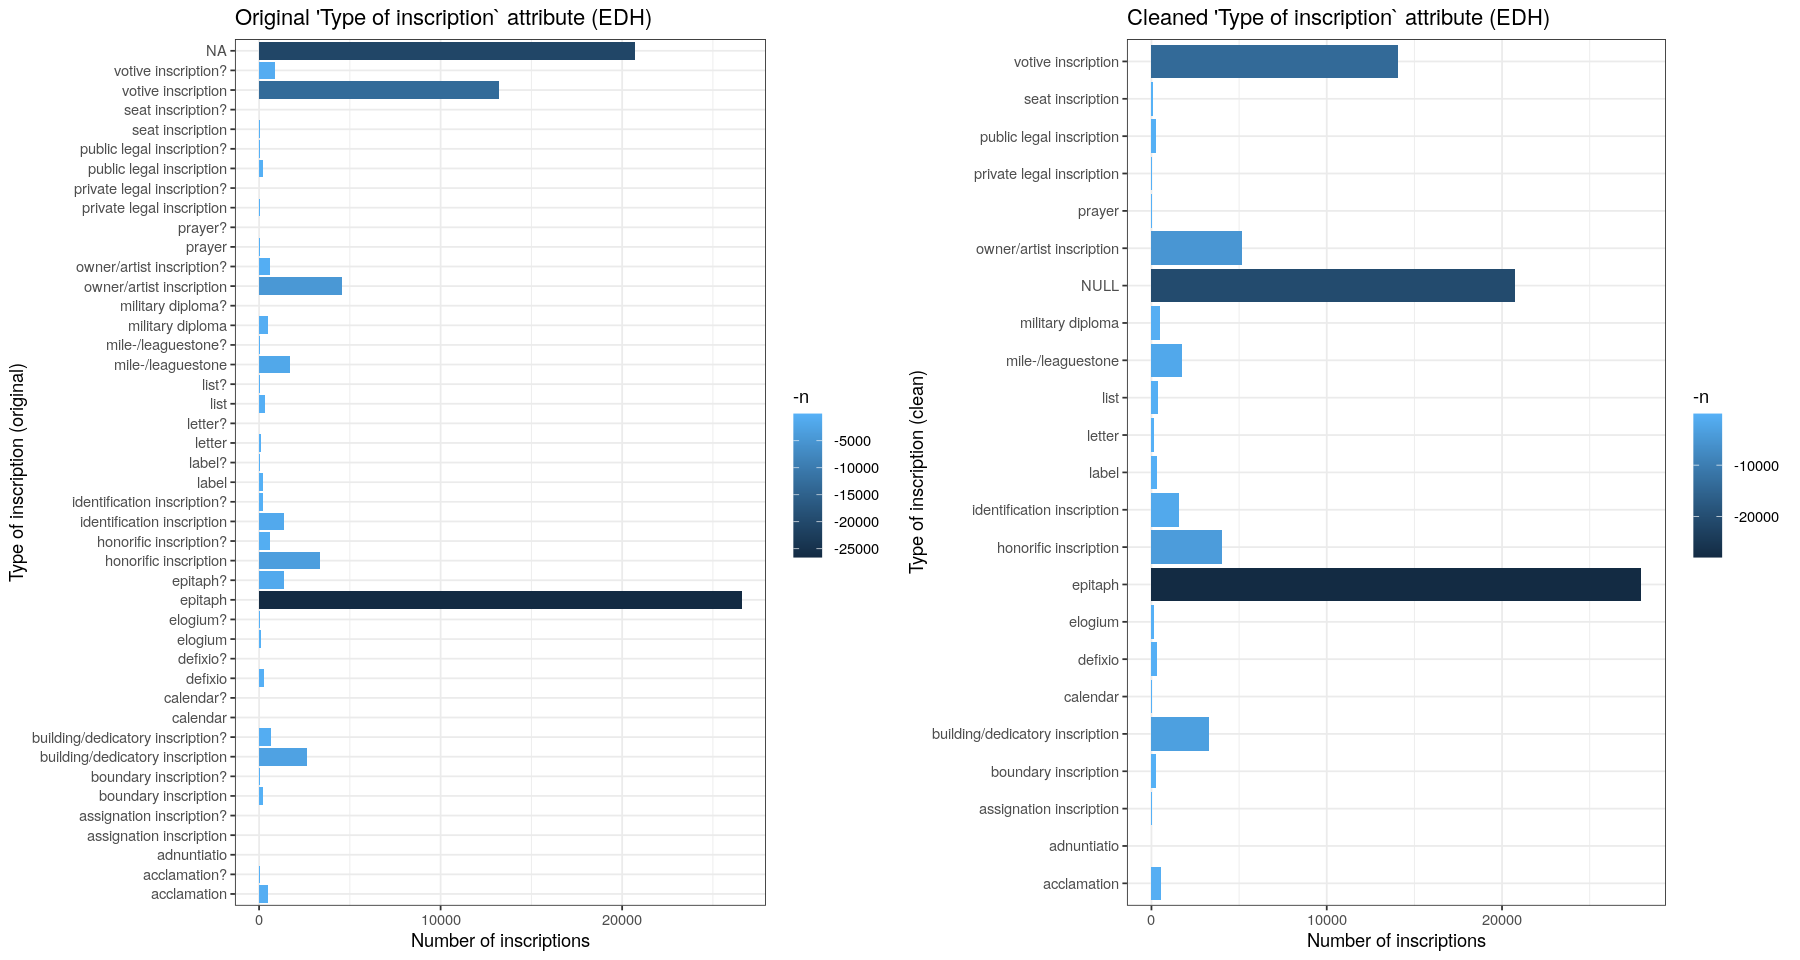

In [313]:
# Example of cleaning the `type of inscription` attribute in EDH. Comparison of categories before/after cleaning.
options(repr.plot.width = 15, repr.plot.height = 8)

EDH_type_orig <- EDH  %>% 
    count(type_of_inscription)  %>% 
    ggplot(aes(x=n, y=type_of_inscription)) + geom_col(aes(fill=-n)) +
    labs(title="Original 'Type of inscription` attribute (EDH)", 
         x="Number of inscriptions", 
         y="Type of inscription (original)") +
    theme_bw()

EDH_type_clean<- EDH  %>% 
    count(type_of_inscription_clean) %>% 
    ggplot(aes(x=n, y=type_of_inscription_clean)) + geom_col(aes(fill=-n))  +
        labs(title="Cleaned 'Type of inscription` attribute (EDH)", 
         x="Number of inscriptions",
        y="Type of inscription (clean)")+
    theme_bw()

ggpubr::ggarrange(EDH_type_orig, EDH_type_clean, ncol = 2, nrow = 1, vjust = 1)

When dealing with unstructured text, we heavily rely on use of Regular Expressions as the most efficient yet simple tool for pattern matching (e.g., https://regex101.com/; packages [stringr for R](https://stringr.tidyverse.org/) and [gsub function in base R](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/grep)). We search for repetitive patterns in the text of the attributes, in order to separate different pieces of information so they can be easily computationally accessed in the later stages of the analysis. To illustrate our approach, we extract information providing a level of spatial uncertainty related to the findspot of an inscription from the textual descriptions of the place. 

The attribute `findspot_ancient` contained textual descriptions of the original findspot, with specifications of the level of certainty connected to a particular place name, e.g. *“Cumae, bei”, "Roma?", "Emerita Augusta, aus", "Bracara Augusta - Lucus Augusti, inter","Epidotium - Ancus, zwischen"*. We have then created a new attribute (`finsdpot_ancient_certainty`) containing categorical values corresponding with the certainty of localization. This way we were able to extract the measure of uncertainty from all records, save it as a separate piece of information in order to use it as a control measure for the level of precision of geographic coordinates.

_Example of R code cleaning of `findspot_ancient` attribute_

```{r} 
EDH$findspot_ancient_clean <- stringr::str_replace(EDH$findspot_ancient, pattern="[,. ] bei| aus", replacement = "")
EDH$findspot_ancient_clean <- stringr::str_replace(EDH$findspot_ancient_clean, pattern="\\?", replacement = "")
EDH$findspot_ancient_clean <- stringr::str_replace(EDH$findspot_ancient_clean, pattern=", inter|, zwischen", replacement = "")
EDH$findspot_ancient_clean <- stringr::str_replace(EDH$findspot_ancient_clean, pattern="(^[\\(])(.+)([\\)]$)", replacement = "\\2")
EDH$findspot_ancient_clean <- stringr::str_replace(EDH$findspot_ancient_clean, pattern = ",$", replacement = "")

```

_Creating an index of localization certainty as `findspot_ancient_certainty` attribute_

```{r}
EDH_clean$findspot_ancient_certainty <- ifelse(grepl(" bei| aus]", EDH_clean$findspot_ancient, ignore.case = T), "Estimated",
ifelse(grepl("inter|zwischen", EDH_clean$findspot_ancient, ignore.case = T), "In between",
ifelse(grepl("\\?", EDH_clean$findspot_ancient, ignore.case = T), "Uncertain",
ifelse(grepl("^\\(", EDH_clean$findspot_ancient, ignore.case = T), "Uncertain Name",
ifelse(grepl("NULL", EDH_clean$findspot_ancient, ignore.case = T), "NULL",
       "Certain" )))))
```

In [317]:
# Data before and after cleaning

EDH  %>% 
    select(findspot_ancient, findspot_ancient_clean, findspot_ancient_certainty)  %>% 
    head(10)

findspot_ancient,findspot_ancient_clean,findspot_ancient_certainty
<chr>,<chr>,<chr>
"Cumae, bei",Cumae,Estimated
Roma,Roma,Certain
NA,NULL,NULL
Ipolcobulcula,Ipolcobulcula,Certain
Roma,Roma,Certain
"Sabora, bei",Sabora,Estimated
Roma,Roma,Certain
Roma?,Roma,Uncertain
Aquae Sulis,Aquae Sulis,Certain


By cleaning the `findspot_ancient` we have managed to streamline the attribute by 35 %: the attribute before cleaning contained 3613 unique values, after cleaning we have 2342 unique values of ancient findspot.

In [324]:
# Data before and after cleaning

EDH  %>% 
    count(findspot_ancient_certainty, sort=T)  %>% 
    mutate(percent = round(n/(nrow(EDH)/100), digits = 2))

findspot_ancient_certainty,n,percent
<chr>,<int>,<dbl>
Certain,52896,64.92
NULL,13420,16.47
Estimated,10716,13.15
Uncertain,2456,3.01
Uncertain Name,1408,1.73
In between,580,0.71


In [340]:
EDH<- EDH  %>% 
    separate(col = coordinates, into = c("latitude", "longitude"), sep = ",", remove = FALSE) 

loc_cert_EDH<- EDH  %>%  
    mutate(latitude_decim = map(EDH$latitude, decimalplaces))  %>% 
    mutate(longitude_decim = map(EDH$longitude, decimalplaces))  %>% 
    select(longitude_decim, latitude_decim, findspot_ancient_certainty) 


ERROR while rich displaying an object: Error: Discrete value supplied to continuous scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

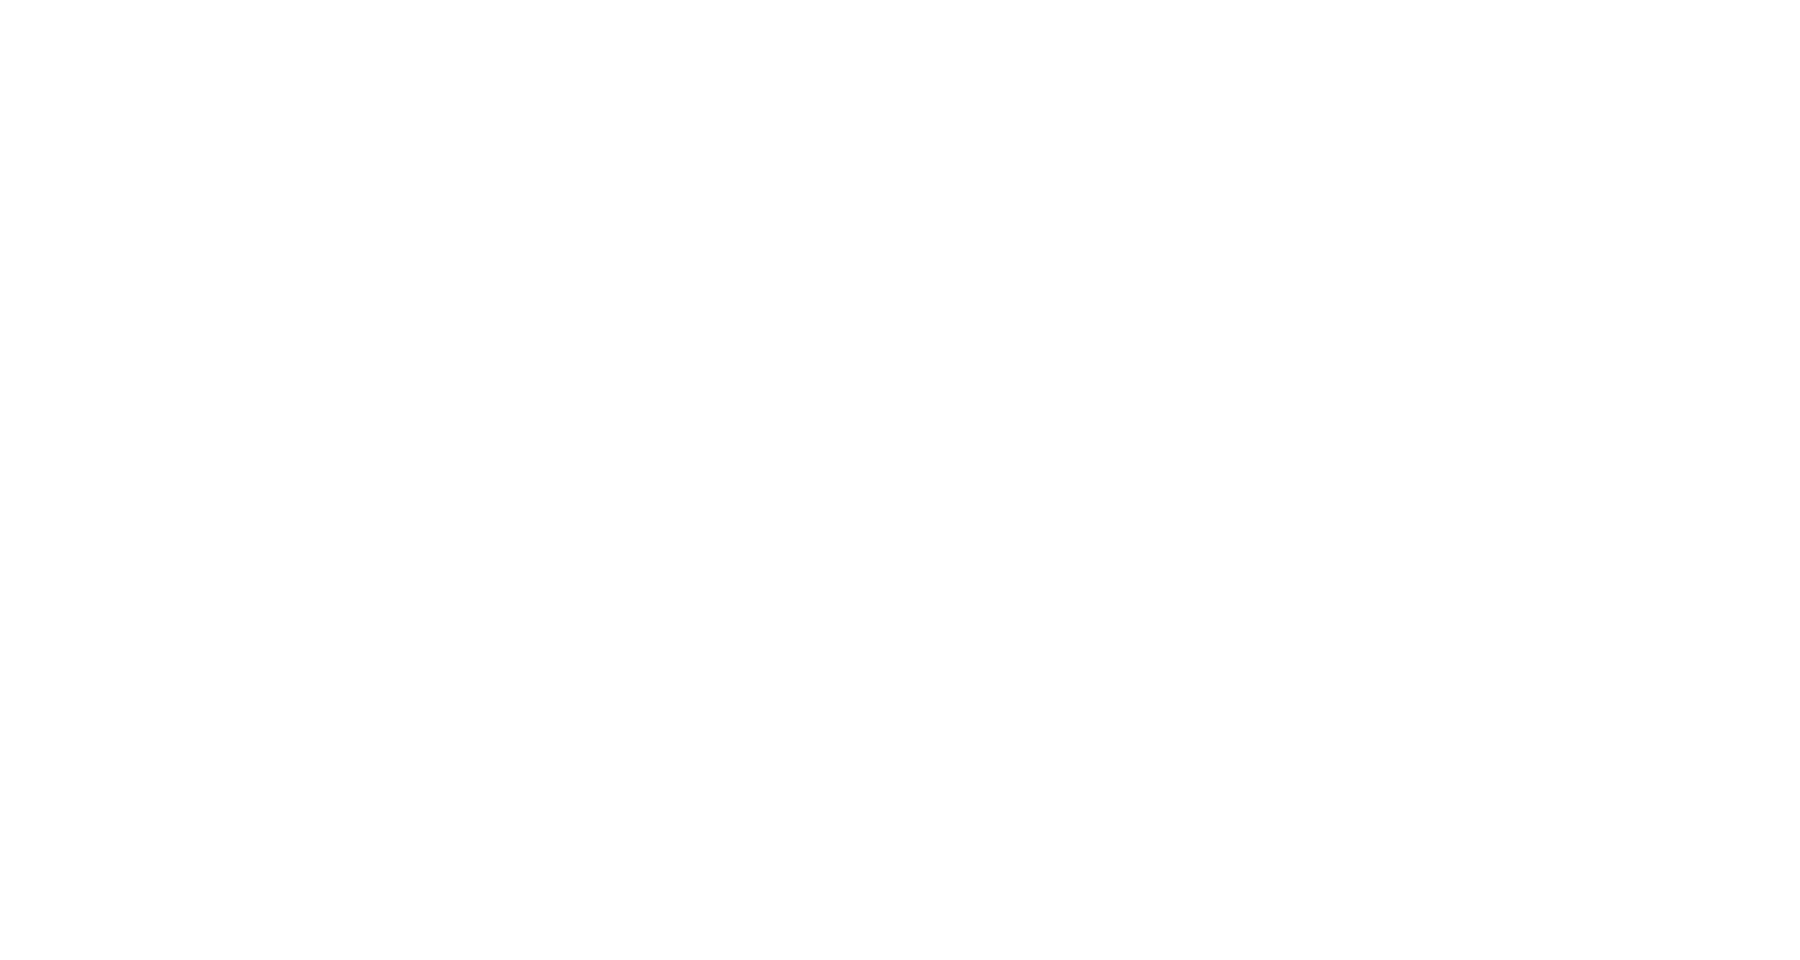

In [342]:
loc_cert_EDH  %>% 
    ggplot(aes(x=findspot_ancient_certainty, y=longitude_decim)) + geom_point()

#### Cleaning of epigraphic text

* Script for EDH dataset: https://github.com/sdam-au/EDH_ETL/blob/master/scripts/1_5_r_TEXT_INSCRIPTION_CLEANING.Rmd  
* Script for EDCS dataset: https://github.com/sdam-au/EDCS_ETL/blob/master/scripts/1_2_r_EDCS_cleaning_text.Rmd

Similarly as the attributes containing metadata have to be transformed to be suitable for computer assisted analysis, the text of an inscription attribute has to be streamlined. Attributes containing the text of an inscription in both sources contained extra symbols, or extra text not present on the original medium, but text entered by mistake during the digitisation.

Moreover, the standard text of an inscription is often marked up in accordance with Leiden epigraphic conventions and thus contains a large number of brackets and additional symbols [REF]. The symbols have a crucial importance when communicating the rate of preservation of the text, the level of modern restoration or additional features of the text, such as interpunction or decoration. However useful the Leiden markup system for study of individual inscriptions and their historical significance, it is highly problematic for any quantified study. Human brain is capable of parsing information differently than a computer and what might be straightforward for an epigrapher when reading an inscription with Leiden markup, proves to be a complex task for a computer. To give you an example, the human brain knows the text [Au]relios is the same as the word Aurelios with no markup. However, for computers [Au]relios and Aurelios are two different words and thus would be counted as two separate instances. 	


```CODE with example of text before cleaning```

Our proposed technical solution eliminates the Leiden markup syntax in a systematic way and produces three different versions of the text designed specifically for their intended type of analysis. We have created a series of Regex cleaning blocks, that solve one type of markup at the time, and then we have built them in a cleaning function producing the desired outcome for the analysis of text. The sequence of the blocks in the cleaning functions was built specifically for individual datasets and type of intended analysis, but the cleaning blocks were designed rather generically and can be used to clean any text with Leiden markup conventions.	

The text of an inscription was transformed into two main versions: 

* A conservative version of the text, contained in the attribute clean_text_conservative. The aim of the conservative text was to have a text with no markup that is as close to the original inscription as preserved on the permanent medium. 

```CODE with example of conservative text after cleaning```

* An interpretive version of the text, contained in the attribute clean_text_interpretive. The interpretive version contains the original text as preserved on a medium enriched with editorial interpretations and reconstructions of the text in order to achieve as rich text of an inscription as possible. For the purpose of NLP analysis, we have created two versions of the interpretive text: one with no interpunction between sentences (clean_text_interpretive_word) and one with preserved interpunction separating individual sentences (clean_text_interpretive_sentence)

```CODE with example of interpretive text after cleaning```

The cleaning procedure for EDCS dataset was more entailed as the attribute `inscription` contained apart from the text of an inscription in some records also commentary, notes to chronology, bibliographical references and other text, not present on the original inscribed medium. Before we could clean the epigraphic text, we needed to separate the text of an inscription and the non-epigraphic text in a transparent and reproducible way. As we wanted to preserve the information and separate it by its category, we developed an additional cleaning script, using Regex in a specific sequence to clean the epigraphic text, extract the extra information, separate it by category and add to the original dataset. 

```CODE with example of text before and after cleaning```

We have managed to process 1268 inscriptions, representing 0.25 % of the entire dataset in a fraction of time that it would have taken a human to go through all the records and search for potential issues one-by-one. As a direct benefit of the scripted cleaning process to the epigraphic community and to the owners of the digital resource, we are now able to report back to the EDCS the ID numbers of problematic records so they can be fixed for future researchers.

The article now continues in script 2, with Python kernel.



## Additional challenges of being FAIR and open

(depending on available space - limits not discussed), ** this section is not finished **

1. Open research infrastructure vs proprietary tools
1. Collaboration: R vs Python exchange, Lists / Data structures btw R and Python, implementing R and Python into one pipeline
1. Being FAIR takes time
